In [1]:
import pandas as pd
import requests
import os
from bs4 import BeautifulSoup
from time import sleep
from matplotlib import font_manager, rc
import matplotlib.pyplot as plt
import warnings

warnings.filterwarnings('ignore')
font_path = 'malgun.ttf'
font_name = font_manager.FontProperties(fname = font_path).get_name()
rc('font', family = font_name)

In [2]:
# NaN(Not a Number, 결측치) : 측정되지 않은 데이터
df = pd.read_excel('excel/시도별_전출입_인구수.xlsx')
df = df.drop(0, axis = 'index')
df['전출지별'] = df['전출지별'].ffill()
df = df.rename({'전출지별':'전출지', '전입지별':'전입지'}, axis = 'columns')
df.head(3)

,전출지,전입지,1970,1971,1972,1973,1974,1975,1976,1977,...,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023
1,전국,전국,4046536,4210164,3687938,4860418,5297969,9011440,6773250,7397623,...,7629098,7755286,7378430,7154226,7297099,7104398,7735491,7213422,6152155,6128738
2,전국,서울특별시,1742813,1671705,1349333,1831858,2050392,3396662,2756510,2893403,...,1573594,1589431,1515602,1472937,1439707,1426493,1578127,1418187,1201527,1206963
3,전국,부산광역시,448577,389797,362202,482061,680984,805979,724664,785117,...,485710,507031,459015,439073,416095,411704,491829,441323,383848,364271


In [3]:
mask = (df['전출지'] == '서울특별시') & (df['전입지'] != '서울특별시')
df3 = df[mask]
df3 = df3.drop('전출지', axis = 'columns')
df3 = df3.set_index('전입지')
df3.head(3)

,1970,1971,1972,1973,1974,1975,1976,1977,1978,1979,...,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023
전입지,,,,,,,,,,,,,,,,,,,,,
전국,1448985,1419016,1210559,1647268,1819660,2937093,2495620,2678007,3028911,2441242,...,1661425,1726687,1655859,1571423,1549937,1476081,1642977,1524430,1236867,1238213
부산광역시,11568,11130,11768,16307,22220,27515,23732,27213,29856,28542,...,17320,17009,15062,14484,13093,12805,13209,13078,11532,11748
대구광역시,-,-,-,-,-,-,-,-,-,-,...,10062,10191,9623,8891,8446,7897,8792,8350,7716,8289


### 1개의 모형(figure)에 1개의 그래프(plot)를 그리는 순서

-> 객체를 따로 만들 필요 없이 계속 그려나가면 된다.
1-1 모형의 크기
 import mapplotlib
 mapplotlib.pyplot.figure(figsize = (10,5))

 또는 from mapplotlib import pyplot as plt
 plt.figure(figsize = (10,5))

 또는 import mapplotlib.pyplot as plt
 plt.figure(figsize = (10,5))

 1-2 모형안에 그래프 그리기
 plt.plot()
 plt.bar()
 plt.scatter()

1-3 모형안에 그래프 꾸미기
 plt.title()
 plt.xlabel()
 plt.xticks()

1-4 그래프 출력 & 저장
 plt.show()
 plt.save_fig()


## 1개의 모형(figure)에 여러개의 그래프(subplot)를 그리는 순서

2-1 모형의 크기
 import mapplotlib
 figure = mapplotlib.pyplot.figure(figsize = (10,5))  : 한개 그래프 그릴때와 달리 저장을 해야 한다. 

2-2 모형안에 원하는 모양과 수량의 서브플롯 생성
 ax1 = figure.add_subplot(행수, 열수, 위치)
 ax2 = figure.add_subplot(행수, 열수, 위치)

2-3 서브 플롯마다 그래프 그리기
 ax1.plot()
 ax2.plot()

2-4 서브 플롯마다 그래프 꾸미기
 ax1.set_title()
 ax1.set_xlabels()
 ax2.set_title()
 ax2.set_xlabels()

2-5 그래프 출력 & 저장
 plt.show()
 plt.save_fig()



In [4]:
sr1 = df3.loc['경기도']
# index, values 가 정수형인지 확인
print('인덱스:', sr1.index[:5])
print('값들:', sr1.values[:5])
#-> 이렇게 하면 values는 숫자인지 알수가 없다. 

인덱스: Index(['1970', '1971', '1972', '1973', '1974'], dtype='object')
값들: [130149 150313 93333 143234 149045]


In [5]:
sr1.values[:5]

array([130149, 150313, 93333, 143234, 149045], dtype=object)

In [6]:
# sr1.values.map(int)  이 방법도 있고,
sr1 = sr1.astype(int) # 이렇게 할 수도 있다.
sr1.values

array([130149, 150313,  93333, 143234, 149045, 253705, 202276, 207722,
       237684, 278411, 297539, 252073, 320174, 400875, 352238, 390265,
       412535, 405220, 415174, 412933, 473889, 384714, 428344, 502584,
       542204, 599411, 520566, 495454, 407050, 471841, 435573, 499575,
       516765, 457656, 400206, 414621, 449632, 431637, 412408, 398282,
       410735, 373771, 354135, 340801, 332785, 359337, 370760, 342433,
       368536, 334293, 375867, 362116, 279731, 279375])

## 1. 1개의 모형(figure)에 1개의 그래프(plot)를 그리는 순서
### 1-1 모형의 크기
### 1-2 모형안에 그래프 그리기
### 1-3 모형안에 그래프 꾸미기<br>
### 1-4 그래프 출력 & 저장<br>

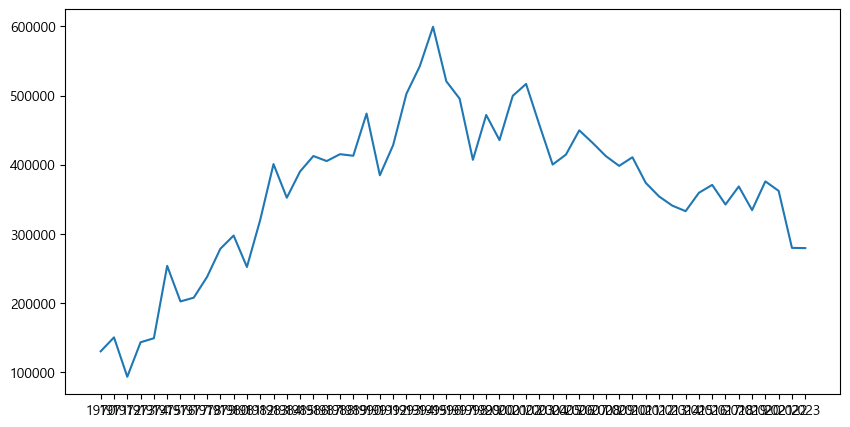

In [7]:
#1-1 모형의 크기
plt.figure(figsize = (10,5))

#1-2 모형안에 그래프 그리기
# pyplot.plot() : 선그래프
# pyplot.plot(series) : 선그래프, index가 x축 values 가 데이터
# pyplot.plot(X축, 데이터)
plt.plot(sr1)

([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  30,
  31,
  32,
  33,
  34,
  35,
  36,
  37,
  38,
  39,
  40,
  41,
  42,
  43,
  44,
  45,
  46,
  47,
  48,
  49,
  50,
  51,
  52,
  53],
 [Text(0, 0, '1970'),
  Text(1, 0, '1971'),
  Text(2, 0, '1972'),
  Text(3, 0, '1973'),
  Text(4, 0, '1974'),
  Text(5, 0, '1975'),
  Text(6, 0, '1976'),
  Text(7, 0, '1977'),
  Text(8, 0, '1978'),
  Text(9, 0, '1979'),
  Text(10, 0, '1980'),
  Text(11, 0, '1981'),
  Text(12, 0, '1982'),
  Text(13, 0, '1983'),
  Text(14, 0, '1984'),
  Text(15, 0, '1985'),
  Text(16, 0, '1986'),
  Text(17, 0, '1987'),
  Text(18, 0, '1988'),
  Text(19, 0, '1989'),
  Text(20, 0, '1990'),
  Text(21, 0, '1991'),
  Text(22, 0, '1992'),
  Text(23, 0, '1993'),
  Text(24, 0, '1994'),
  Text(25, 0, '1995'),
  Text(26, 0, '1996'),
  Text(27, 0, '1997'),
  Text(28, 0, '1998'),
  Text(29, 0, '1999'),
  Tex

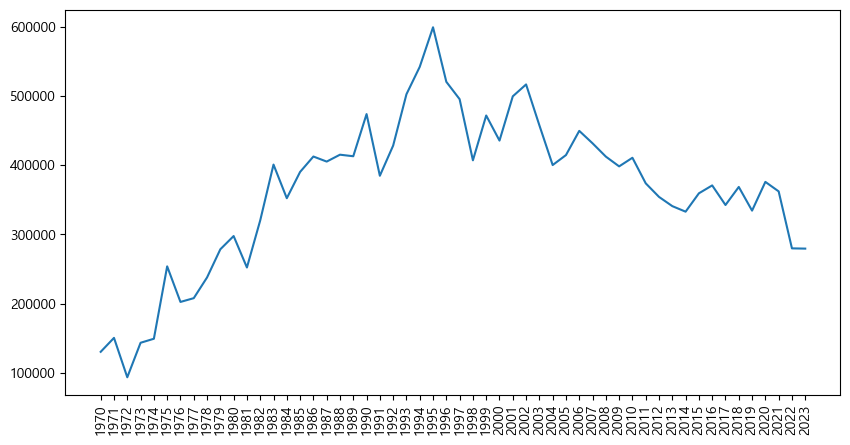

In [8]:
plt.figure(figsize = (10,5))
plt.plot(sr1.index, sr1.values)

#1-3 모형안에 그래프 꾸미기
# 위 그래프에서 x 축이 다 깨짐

plt.xticks(rotation = 90)
# 코드값의 실행결과를 한번 뿌려줘서 숫자가 쫙 뜬다. 이걸 안보려면 plt.show를 해줘야 한다.

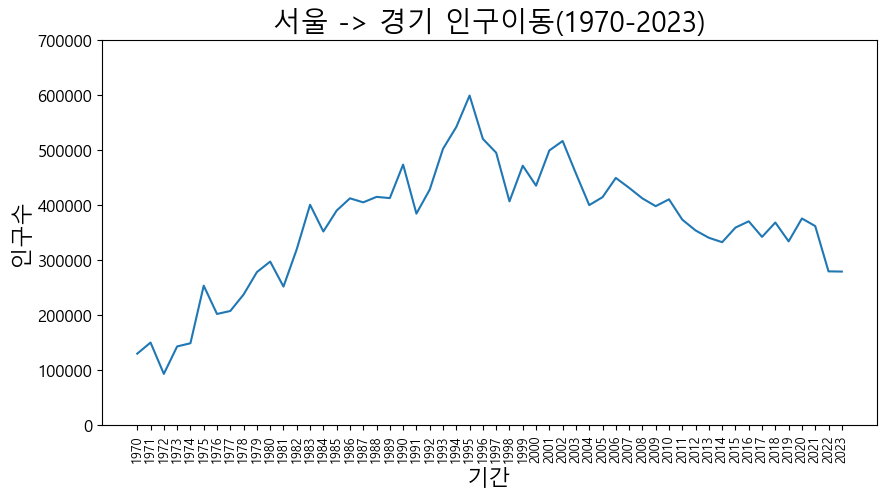

In [9]:
plt.figure(figsize = (10,5))
plt.plot(sr1.index, sr1.values)

plt.xticks(rotation = 90, size = 9)
plt.ylim(0, 700000) # y축의 크기를 정하는..
plt.yticks(size = 12)
plt.xlabel('기간',size = 16)
plt.ylabel('인구수',size = 16)
plt.title('서울 -> 경기 인구이동(1970-2023)', size = 20)

plt.show()

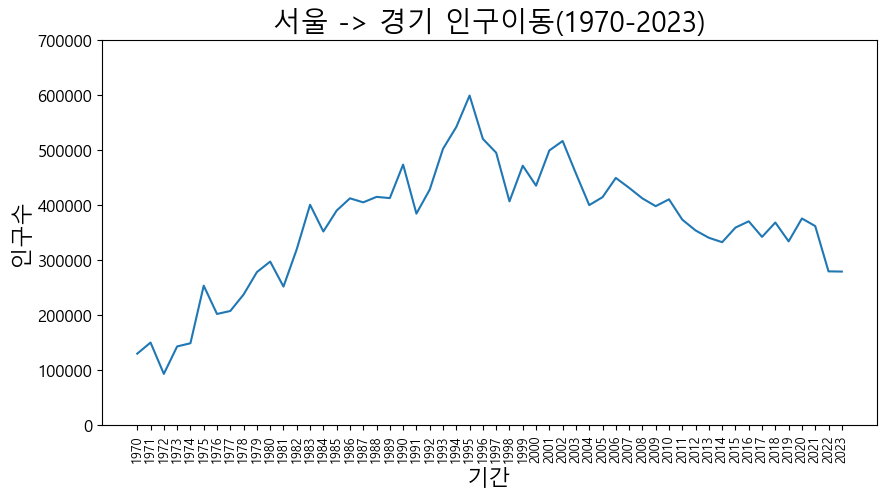

In [10]:
plt.figure(figsize = (10,5))
plt.plot(sr1.index, sr1.values)

plt.xticks(rotation = 90, size = 9)
plt.ylim(0, 700000) # y축의 크기를 정하는..
plt.yticks(size = 12)
plt.xlabel('기간',size = 16)
plt.ylabel('인구수',size = 16)
plt.title('서울 -> 경기 인구이동(1970-2023)', size = 20)

#1-4 그래프 출력 및 저장
#plt.show()
plt.savefig('결과.jpeg')

## 2. 1개의 모형(figure)에 1개의 그래프(plot)를 그리는 순서
### 2-1 모형의 크기
### 2-2 모형안에 원하는 모양과 수량의 서브플롯 생성
### 2-3 서브플롯마다 그래프 그리기
### 2-4 서브플롯마다 그래프 꾸미기
### 2-5 그래프 출력 & 저장

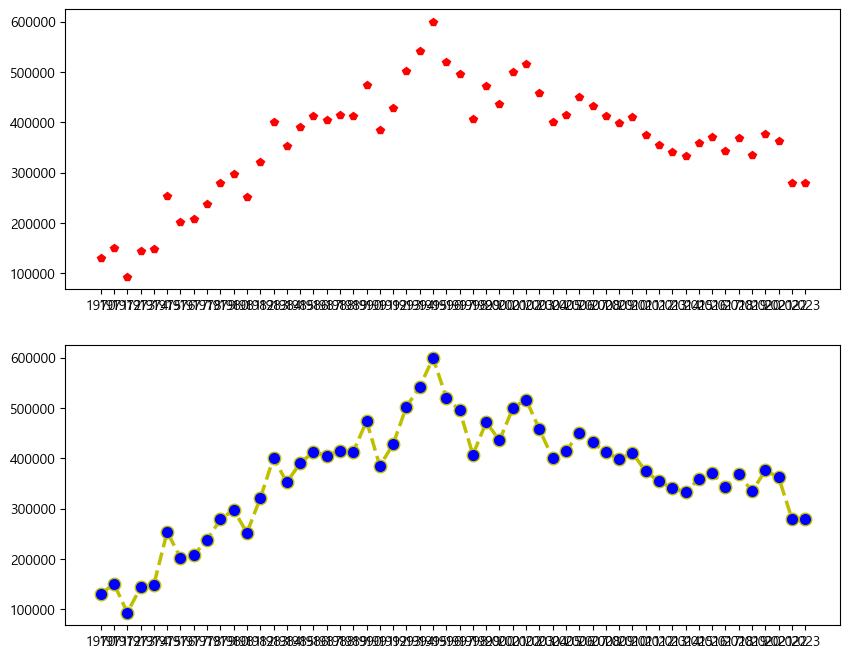

In [11]:
# 2-1 모형의 크기
figure = plt.figure(figsize = (10,8))

# 2-2 모형안에 원하는 모양과 수량의 서브플롯 생성
ax1 = figure.add_subplot(2,1,1)
ax2 = figure.add_subplot(2,1,2)

# 2-3 서브플롯마다 그래프 그리기
ax1.plot(sr1,'p',color = 'red',)
ax2.plot(sr1, ls = '--', linewidth = 2.5, marker = 'o', color = 'y', 
         markersize = 9, markerfacecolor = 'blue')


(0.0, 700000.0)

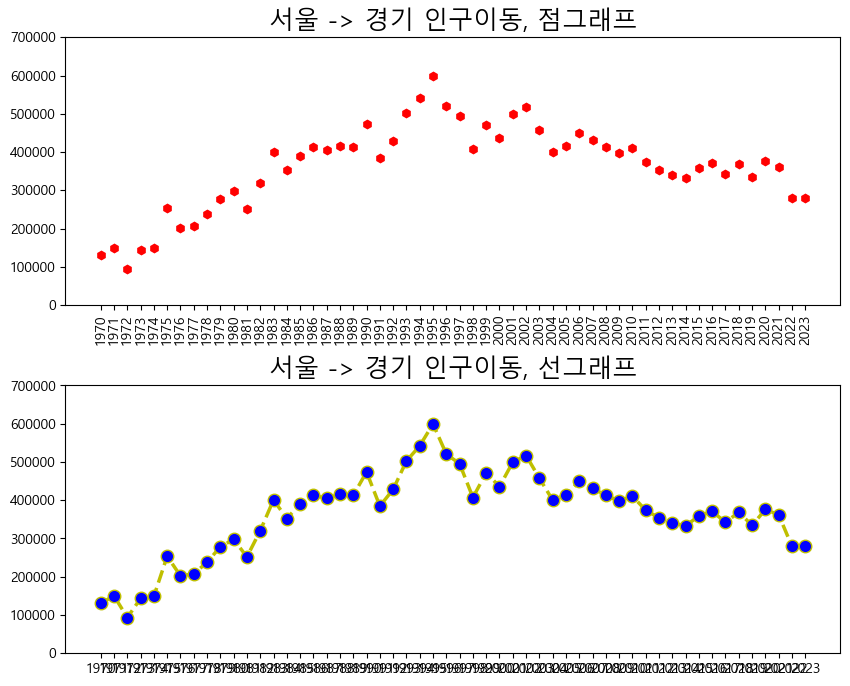

In [12]:
# 2-1 모형의 크기
figure = plt.figure(figsize = (10,8))

# 2-2 모형안에 원하는 모양과 수량의 서브플롯 생성
ax1 = figure.add_subplot(2,1,1)
ax2 = figure.add_subplot(2,1,2)

# 2-3 서브플롯마다 그래프 그리기
ax1.plot(sr1,'h',color = 'red',)
ax2.plot(sr1, ls = '--', linewidth = 2.5, marker = 'o', color = 'y', 
         markersize = 9, markerfacecolor = 'blue')

#2-4 서브플롯마다 그래프 꾸미기
figure.subplots_adjust(hspace=0.3)  # 위 아래 그래프가 좀 겹쳐서..이를 조정)
ax1.set_title('서울 -> 경기 인구이동, 점그래프', size=18)
ax1.set_ylim(0,700000)
# ax1.set_xtics(rotation = 90) # 이건 에러가 난다.
ax1.set_xticklabels(sr1.index, rotation = 90)
ax2.set_title('서울 -> 경기 인구이동, 선그래프', size=18)
ax2.set_ylim(0,700000)


In [13]:
df3

,1970,1971,1972,1973,1974,1975,1976,1977,1978,1979,...,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023
전입지,,,,,,,,,,,,,,,,,,,,,
전국,1448985,1419016,1210559,1647268,1819660,2937093,2495620,2678007,3028911,2441242,...,1661425,1726687,1655859,1571423,1549937,1476081,1642977,1524430,1236867,1238213
부산광역시,11568,11130,11768,16307,22220,27515,23732,27213,29856,28542,...,17320,17009,15062,14484,13093,12805,13209,13078,11532,11748
대구광역시,-,-,-,-,-,-,-,-,-,-,...,10062,10191,9623,8891,8446,7897,8792,8350,7716,8289
인천광역시,-,-,-,-,-,-,-,-,-,-,...,43212,44915,43745,40485,41233,38571,39875,44859,43887,45942
광주광역시,-,-,-,-,-,-,-,-,-,-,...,9759,9216,8354,7932,7378,7014,7178,7145,6159,6120
대전광역시,-,-,-,-,-,-,-,-,-,-,...,13403,13453,12619,11815,11591,10759,11033,11144,10454,10234
울산광역시,-,-,-,-,-,-,-,-,-,-,...,6047,5950,5102,4260,4086,3827,4085,4065,3584,3655
세종특별자치시,-,-,-,-,-,-,-,-,-,-,...,6481,7550,5943,5813,5861,5919,5546,5580,4892,4301
경기도,130149,150313,93333,143234,149045,253705,202276,207722,237684,278411,...,332785,359337,370760,342433,368536,334293,375867,362116,279731,279375


In [14]:
df4 = df3.copy()
df5 = df4.loc[['충청남도','경상북도','강원특별자치도','전라남도'],'1980':]
df5.rename({'강원특별자치도':'강원도'},inplace=True)
df5

,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,...,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023
전입지,,,,,,,,,,,,,,,,,,,,,
충청남도,54480,51369,48834,55344,50318,49520,47888,48678,49038,31707,...,21473,22299,21741,21020,20426,18522,19814,20129,17573,17060
경상북도,48839,30928,27440,29601,26842,26297,26221,27844,26235,22374,...,14456,15113,14236,12464,12017,11935,11987,12568,11095,10607
강원도,32858,32116,31013,31308,30470,29911,28489,28699,26691,26394,...,21173,22659,21590,21016,19558,19105,20701,20974,18374,16340
전라남도,56251,57645,55408,57737,52779,52629,41082,42667,40695,36188,...,14591,14598,13065,12426,11209,11334,11210,11305,9839,8828


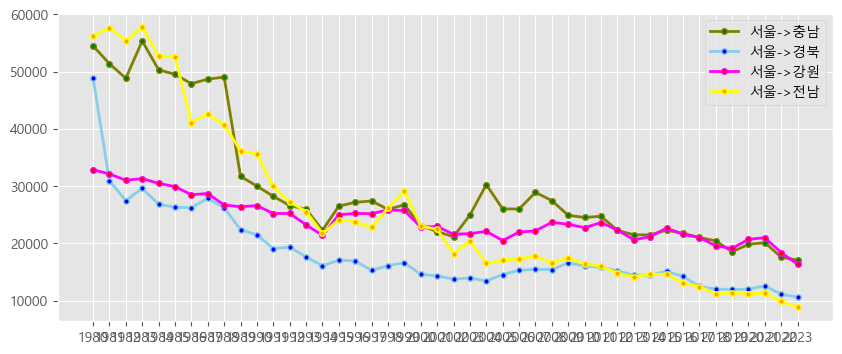

In [15]:
plt.style.use('ggplot') # 바탕에 그리드를 그려준다.

figure = plt.figure(figsize = (10,4))
ax = figure.add_subplot(1,1,1)

ax.plot(df5.loc['충청남도'],marker = 'o',markersize = 4, linewidth = 2, color = 'olive'  , markerfacecolor = 'green' )
ax.plot(df5.loc['경상북도'],marker = 'o',markersize = 4, linewidth = 2, color = 'skyblue', markerfacecolor = 'blue'  )
ax.plot(df5.loc['강원도']  ,marker = 'o',markersize = 4, linewidth = 2, color = 'magenta', markerfacecolor = 'red'   )
ax.plot(df5.loc['전라남도'],marker = 'o',markersize = 4, linewidth = 2, color = 'yellow' , markerfacecolor = 'orange')

# legend 추가 방법은 두가지
# 1개는 위에 직접 쓰거나
# 교재 125페이지 46라인에 쓴것 처럼

ax.legend(labels = ['서울->충남','서울->경북','서울->강원','서울->전남'], loc = 'best')

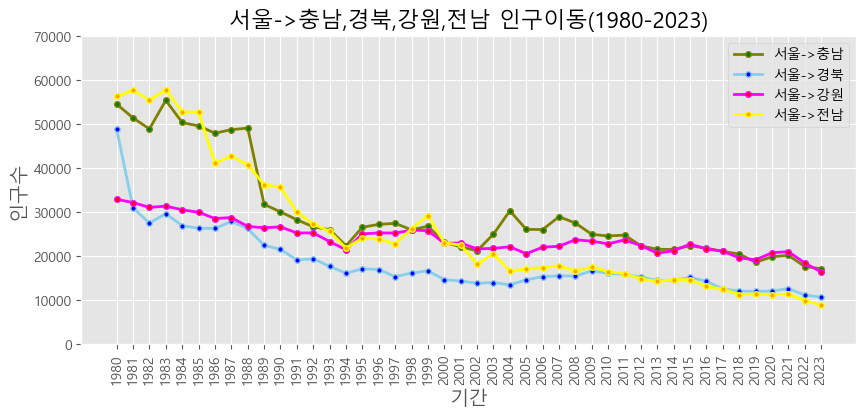

In [16]:

figure = plt.figure(figsize = (10,4))
ax = figure.add_subplot(1,1,1)

ax.plot(df5.loc['충청남도'],marker = 'o',markersize = 4, linewidth = 2, color = 'olive'  , markerfacecolor = 'green' ,
        label = '서울->충남')
ax.plot(df5.loc['경상북도'],marker = 'o',markersize = 4, linewidth = 2, color = 'skyblue', markerfacecolor = 'blue'  ,
        label = '서울->경북')
ax.plot(df5.loc['강원도']  ,marker = 'o',markersize = 4, linewidth = 2, color = 'magenta', markerfacecolor = 'red'   ,
        label = '서울->강원')
ax.plot(df5.loc['전라남도'],marker = 'o',markersize = 4, linewidth = 2, color = 'yellow' , markerfacecolor = 'orange',
        label = '서울->전남')

ax.legend(loc = 'best')
ax.set_ylim(0,70000)
ax.set_xlabel('기간',size = 14)
ax.set_ylabel('인구수', size = 14)
ax.set_xticklabels(df5.columns, rotation = 90)
ax.set_title('서울->충남,경북,강원,전남 인구이동(1980-2023)', size =16)

plt.show()

In [17]:
df5.columns

Index(['1980', '1981', '1982', '1983', '1984', '1985', '1986', '1987', '1988',
       '1989', '1990', '1991', '1992', '1993', '1994', '1995', '1996', '1997',
       '1998', '1999', '2000', '2001', '2002', '2003', '2004', '2005', '2006',
       '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014', '2015',
       '2016', '2017', '2018', '2019', '2020', '2021', '2022', '2023'],
      dtype='object')

ax.plot(df5.loc['충청남도'],marker = 'o',markersize = 4, linewidth = 2, color = 'olive'  , markerfacecolor = 'green' ,
        label = '서울->충남')
ax.plot(df5.loc['경상북도'],marker = 'o',markersize = 4, linewidth = 2, color = 'skyblue', markerfacecolor = 'blue'  ,
        label = '서울->경북')
ax.plot(df5.loc['강원도']  ,marker = 'o',markersize = 4, linewidth = 2, color = 'magenta', markerfacecolor = 'red'   ,
        label = '서울->강원')
ax.plot(df5.loc['전라남도'],marker = 'o',markersize = 4, linewidth = 2, color = 'yellow' , markerfacecolor = 'orange',
        label = '서울->전남')
        
        이걸 for 문으로

In [18]:
#print([1,2,3,'a','x'])
#print([1,2,3,'b','y'])
#print([1,2,3,'c','z'])

#이걸 for로..

# for 변수 in 목록

# for 변수 in [[a,x],[b,y],[c,z]]
# print([1,2,3]+변수)

# 근데 변수가 떨어져 있으면?

In [19]:
numbers = [1,2,3,4,5]
friends = ['민수','진철','미영','수진','수형']
colors  = ['white','black','green','red','blue']

#friends[0]
#totals = [[1,'민수','white'],[],[]] # 이렇게 만들려고 하는 경우
totals = []

for i in range(0,5):
    totals.append([numbers[i],friends[i],colors[i]])
totals

[[1, '민수', 'white'],
 [2, '진철', 'black'],
 [3, '미영', 'green'],
 [4, '수진', 'red'],
 [5, '수형', 'blue']]

In [20]:
# 더 쉽게 해결
list(zip(numbers,friends,colors))

[(1, '민수', 'white'),
 (2, '진철', 'black'),
 (3, '미영', 'green'),
 (4, '수진', 'red'),
 (5, '수형', 'blue')]

In [21]:
idx_list   = ['충청남도','경상북도','강원도','전라남도']
color_list = ['olive','skyblue','magenta','yellow']
face_list  = ['green','blue','red','orange']
label_list = ['충남','경북','강원','전남']

for x in zip(idx_list, color_list, face_list, label_list):
    print(f'x={x}')

x=('충청남도', 'olive', 'green', '충남')
x=('경상북도', 'skyblue', 'blue', '경북')
x=('강원도', 'magenta', 'red', '강원')
x=('전라남도', 'yellow', 'orange', '전남')


In [22]:
idx_list   = ['충청남도','경상북도','강원도','전라남도']
color_list = ['olive','skyblue','magenta','yellow']
face_list  = ['green','blue','red','orange']
label_list = ['충남','경북','강원','전남']

for idx, color, face, label in zip(idx_list, color_list, face_list, label_list):
    e

NameError: name 'e' is not defined

Text(0.5, 1.0, '서울 -> 충남,경북,강원,전남 인구이동(1980-2023)')

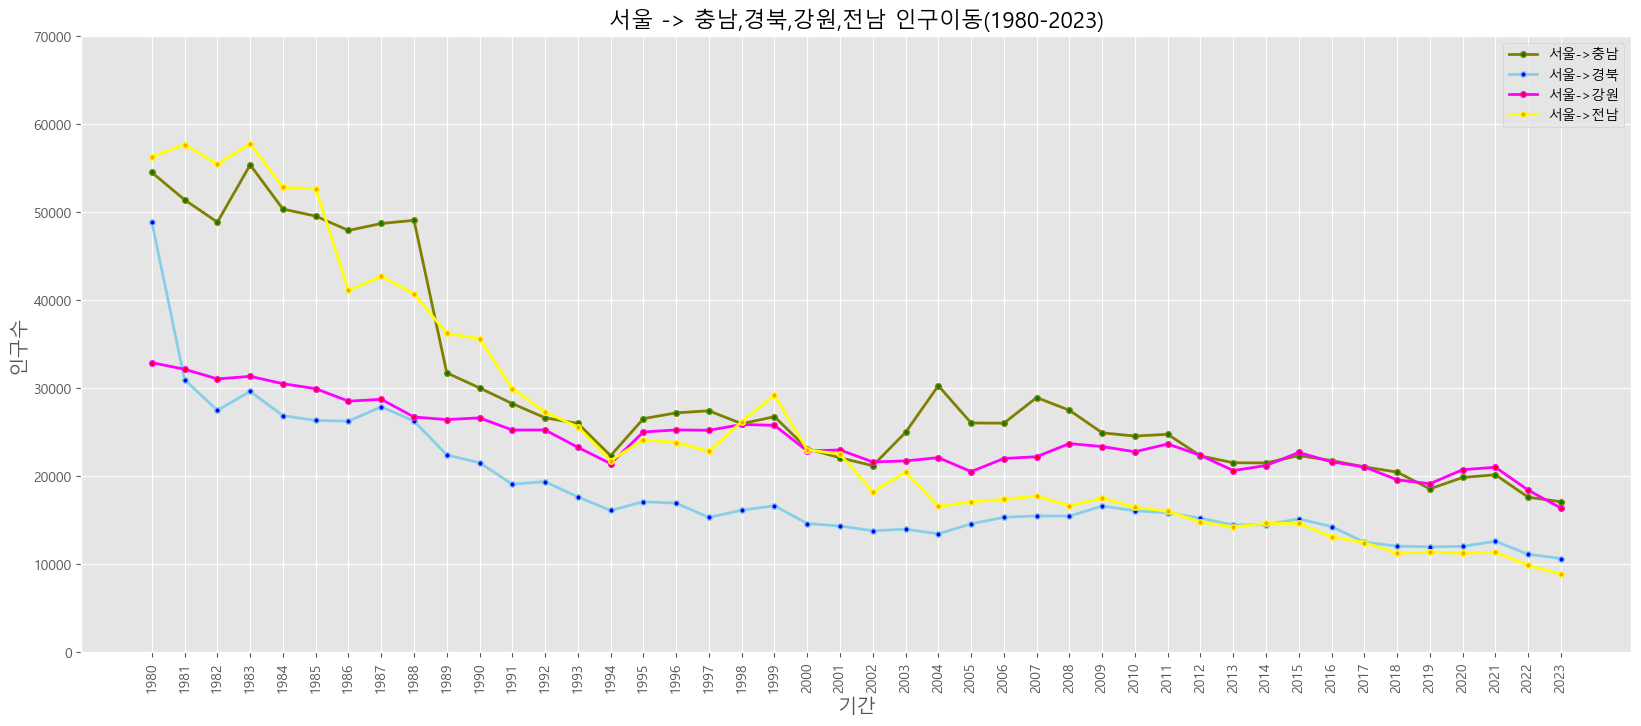

In [23]:
idx_list   = ['충청남도','경상북도','강원도','전라남도']
color_list = ['olive','skyblue','magenta','yellow']
face_list  = ['green','blue','red','orange']
label_list = ['충남','경북','강원','전남']

plt.style.use('ggplot') 

figure = plt.figure(figsize = (20,8))
ax = figure.add_subplot(1,1,1)

for idx, color, face, label in zip(idx_list, color_list, face_list, label_list):
    ax.plot(df5.loc[idx],marker = 'o',markersize = 4, linewidth = 2, color = color  , markerfacecolor = face,
           label = f'서울->{label}')
    
ax.legend(labels = ['서울->충남','서울->경북','서울->강원','서울->전남'], loc = 'best')

ax.set_ylim(0,70000)
ax.set_xlabel('기간',size = 14)
ax.set_ylabel('인구수', size = 14)
ax.set_xticklabels(df5.columns, rotation = 90)
#ax.set_title('서울->충남,경북,강원,전남 인구이동(1980-2023)', size =16)
title=','.join(label_list)
ax.set_title(f"서울 -> {title} 인구이동(1980-2023)", size = 16)

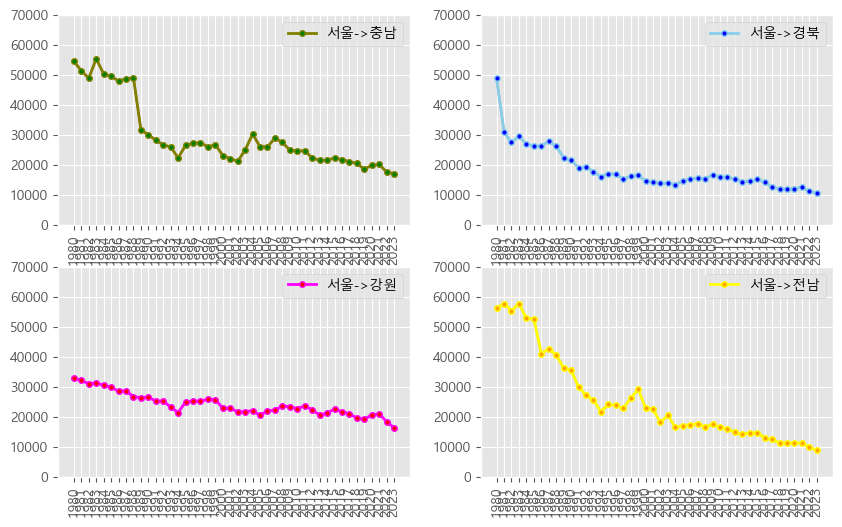

In [24]:
#교재 127 페이지 4개 그리기
plt.style.use('ggplot')
figure = plt.figure(figsize = (10,6))

ax1 = figure.add_subplot(2,2,1)
ax2 = figure.add_subplot(2,2,2)
ax3 = figure.add_subplot(2,2,3)
ax4 = figure.add_subplot(2,2,4)

ax1.plot(df5.loc['충청남도'])
ax2.plot(df5.loc['경상북도'])
ax3.plot(df5.loc['강원도'])
ax4.plot(df5.loc['전라남도'])

ax1.plot(df5.loc['충청남도'],marker = 'o',markersize = 4, linewidth = 2, color = 'olive'  , markerfacecolor = 'green' ,
        label = '서울->충남')
ax2.plot(df5.loc['경상북도'],marker = 'o',markersize = 4, linewidth = 2, color = 'skyblue', markerfacecolor = 'blue'  ,
        label = '서울->경북')
ax3.plot(df5.loc['강원도']  ,marker = 'o',markersize = 4, linewidth = 2, color = 'magenta', markerfacecolor = 'red'   ,
        label = '서울->강원')
ax4.plot(df5.loc['전라남도'],marker = 'o',markersize = 4, linewidth = 2, color = 'yellow' , markerfacecolor = 'orange',
        label = '서울->전남')

ax1.set_ylim(0,70000)
ax2.set_ylim(0,70000)
ax3.set_ylim(0,70000)
ax4.set_ylim(0,70000)

ax1.legend(loc = 'best')
ax2.legend(loc = 'best')
ax3.legend(loc = 'best')
ax4.legend(loc = 'best')

ax1.set_xticklabels(df5.columns, rotation = 90)
ax2.set_xticklabels(df5.columns, rotation = 90)
ax3.set_xticklabels(df5.columns, rotation = 90)
ax4.set_xticklabels(df5.columns, rotation = 90)

plt.show()

In [25]:
score1 = int(input('정수입력: '))
score2 = int(input('정수입력: '))
score3 = int(input('정수입력: '))
score4 = int(input('정수입력: '))
score5 = int(input('정수입력: '))
scores = [score1, score2, score3, score4, score5]

print(scores)

정수입력: 


ValueError: invalid literal for int() with base 10: ''

In [26]:
scores = []
for i in range(1,6):
    score = int(input(f'정수{i} 입력: '))
    scores.append(score)
scores

정수1 입력: 99
정수2 입력: 88
정수3 입력: 77
정수4 입력: 66
정수5 입력: 55


[99, 88, 77, 66, 55]

In [ ]:
figure = plt.figure(figsize = (10,6))

ax1 = figure.add_subplot(2,2,1)
ax2 = figure.add_subplot(2,2,2)
ax3 = figure.add_subplot(2,2,3)
ax4 = figure.add_subplot(2,2,4)
ax_list = [ax1,ax2,ax3,ax4]

ax1.plot(df5.loc['충청남도'])
ax2.plot(df5.loc['경상북도'])
ax3.plot(df5.loc['강원도'])
ax4.plot(df5.loc['전라남도'])

ax1.plot(df5.loc['충청남도'],marker = 'o',markersize = 4, linewidth = 2, color = 'olive'  , markerfacecolor = 'green' ,
        label = '서울->충남')
ax2.plot(df5.loc['경상북도'],marker = 'o',markersize = 4, linewidth = 2, color = 'skyblue', markerfacecolor = 'blue'  ,
        label = '서울->경북')
ax3.plot(df5.loc['강원도']  ,marker = 'o',markersize = 4, linewidth = 2, color = 'magenta', markerfacecolor = 'red'   ,
        label = '서울->강원')
ax4.plot(df5.loc['전라남도'],marker = 'o',markersize = 4, linewidth = 2, color = 'yellow' , markerfacecolor = 'orange',
        label = '서울->전남')

ax1.set_ylim(0,70000)
ax2.set_ylim(0,70000)
ax3.set_ylim(0,70000)
ax4.set_ylim(0,70000)

ax1.legend(loc = 'best')
ax2.legend(loc = 'best')
ax3.legend(loc = 'best')
ax4.legend(loc = 'best')

ax1.set_xticklabels(df5.columns, rotation = 90)
ax2.set_xticklabels(df5.columns, rotation = 90)
ax3.set_xticklabels(df5.columns, rotation = 90)
ax4.set_xticklabels(df5.columns, rotation = 90)


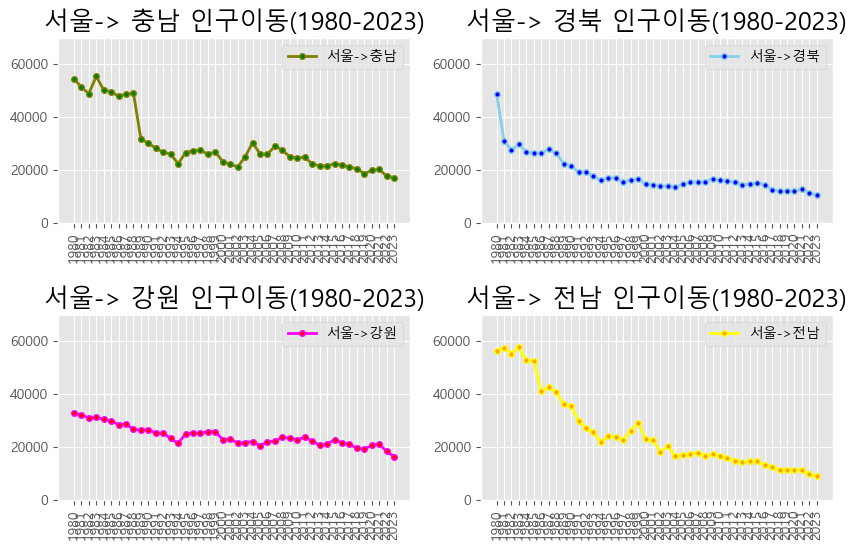

In [36]:
idx_list   = ['충청남도','경상북도','강원도','전라남도']
color_list = ['olive','skyblue','magenta','yellow']
face_list  = ['green','blue','red','orange']
label_list = ['충남','경북','강원','전남']

figure = plt.figure(figsize = (10,6))
figure.subplots_adjust(hspace = 0.5)

ax_list = []
for n in range(1,5):
    ax = figure.add_subplot(2,2,n)
    ax_list.append(ax)
    
for ax, idx, color, face, label in zip(ax_list, idx_list, color_list, face_list, label_list):
    ax.plot(df5.loc[idx],marker = 'o',markersize = 4, linewidth = 2, color = color  , markerfacecolor = face ,
        label = f'서울->{label}')
    ax.set_ylim(0,70000)
    ax.legend(loc = 'best')
    ax.set_xticklabels(df5.columns, rotation = 90)
    title = f'서울-> {label} 인구이동(1980-2023)'
    ax.set_title(title,size=18)

    
plt.show()

In [37]:
# 막대그래프 (p132)
df5

,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,...,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023
전입지,,,,,,,,,,,,,,,,,,,,,
충청남도,54480,51369,48834,55344,50318,49520,47888,48678,49038,31707,...,21473,22299,21741,21020,20426,18522,19814,20129,17573,17060
경상북도,48839,30928,27440,29601,26842,26297,26221,27844,26235,22374,...,14456,15113,14236,12464,12017,11935,11987,12568,11095,10607
강원도,32858,32116,31013,31308,30470,29911,28489,28699,26691,26394,...,21173,22659,21590,21016,19558,19105,20701,20974,18374,16340
전라남도,56251,57645,55408,57737,52779,52629,41082,42667,40695,36188,...,14591,14598,13065,12426,11209,11334,11210,11305,9839,8828


In [63]:
df6= df3.loc[['충청남도','경상북도','강원특별자치도','전라남도'],'2013':]
df6.rename({'강원특별자치도':'강원도'},inplace=True)
df6.columns = df6.columns.map(int)
df6

,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023
전입지,,,,,,,,,,,
충청남도,21486,21473,22299,21741,21020,20426,18522,19814,20129,17573,17060
경상북도,14420,14456,15113,14236,12464,12017,11935,11987,12568,11095,10607
강원도,20601,21173,22659,21590,21016,19558,19105,20701,20974,18374,16340
전라남도,14187,14591,14598,13065,12426,11209,11334,11210,11305,9839,8828


<BarContainer object of 11 artists>

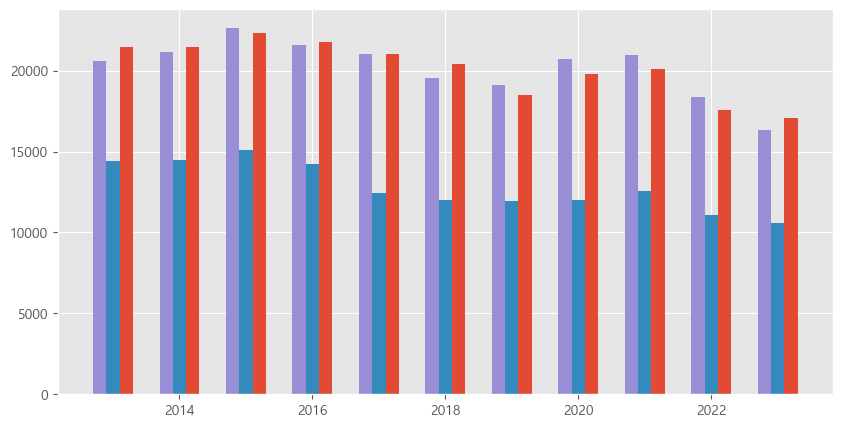

In [70]:
idx_list = ['충청남도','경상북도','강원도','전라남도']
sr1 = df6.loc['충청남도']
sr2 = df6.loc['경상북도']
sr3 = df6.loc['강원도']

figure = plt.figure(figsize = (10,5))
ax = figure.add_subplot(1,1,1)
ax.bar(height = sr1.values, x = sr1.index+0.2,width = 0.2)
ax.bar(height = sr2.values, x = sr2.index+0.0,width = 0.2)
ax.bar(height = sr3.values, x = sr2.index-0.2,width = 0.2)



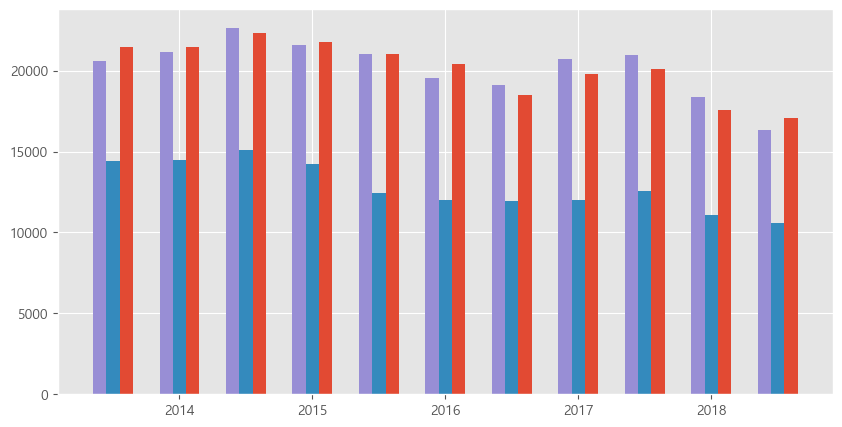

In [91]:
idx_list = ['충청남도','경상북도','강원도','전라남도']
sr1 = df6.loc['충청남도']
sr2 = df6.loc['경상북도']
sr3 = df6.loc['강원도']

figure = plt.figure(figsize = (10,5))
ax = figure.add_subplot(1,1,1)
ax.bar(height = sr1.values, x = sr1.index+0.2,width = 0.2)
ax.bar(height = sr2.values, x = sr2.index+0.0,width = 0.2)
ax.bar(height = sr3.values, x = sr2.index-0.2,width = 0.2)

# 위 그래프는 x 축 숫자가 중간중간 생략됨
# 숫자라서 그럼. 그래서 문자로 바꾸면 됨 : 이게 아니었음. 위랑 똑같음.
axis_x = [str(year) for year in range(2013,2024)]
ax.set_xticklabels(axis_x)
plt.show()

In [85]:
text = []
for i in range(2013,2024):
    text.append(str(i))
text

['2013',
 '2014',
 '2015',
 '2016',
 '2017',
 '2018',
 '2019',
 '2020',
 '2021',
 '2022',
 '2023']

In [86]:
[str(i) for i in range(2013,2024)] # list 내포 사용하기

['2013',
 '2014',
 '2015',
 '2016',
 '2017',
 '2018',
 '2019',
 '2020',
 '2021',
 '2022',
 '2023']

In [89]:
list(map(str, range(2013,2024)))

['2013',
 '2014',
 '2015',
 '2016',
 '2017',
 '2018',
 '2019',
 '2020',
 '2021',
 '2022',
 '2023']

<Axes: >

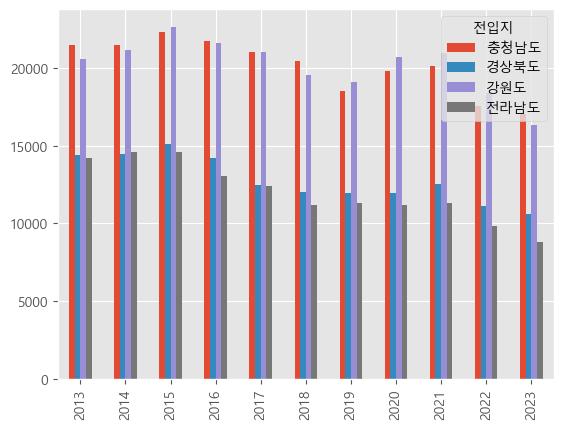

In [96]:
df6.T.plot(kind = 'bar') # pandas 내장 그래프는 편하다. 알아서 다 해준다.

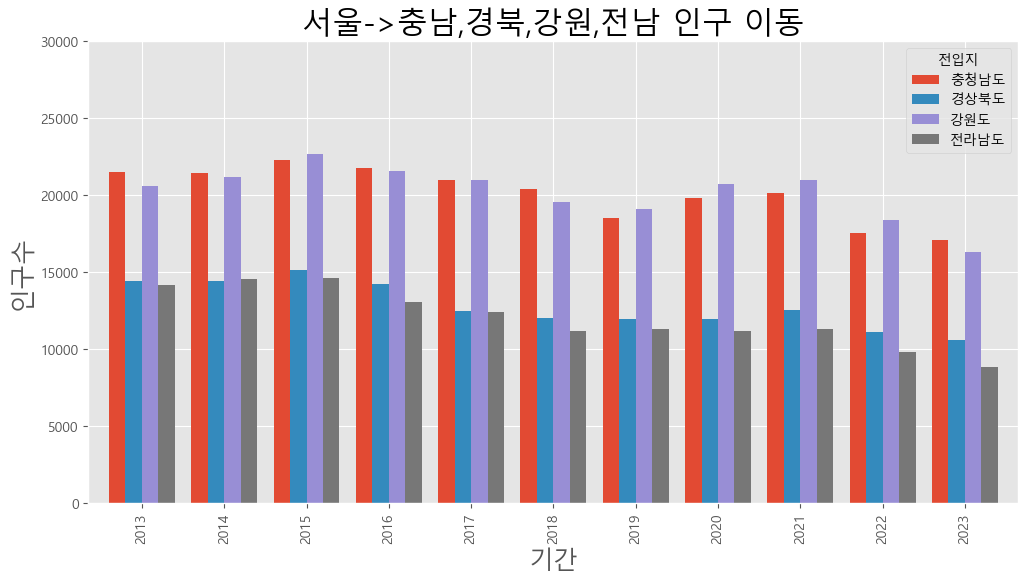

In [104]:
ax = df6.T.plot(kind = 'bar',figsize=(12,6), width = 0.8) # pandas내 matplotlib이 내장. 근데, 객체를 불러오기 위해서 ax 객체를 만들고, 이에 대해서 ..
ax.set_title('서울->충남,경북,강원,전남 인구 이동',size = 22)  # 객체를 직접 만든 다음에 이에 대해서 작업
ax.set_ylim(0,30000)
ax.set_xlabel('기간',size=18)
ax.set_ylabel('인구수',size=18)
plt.show()

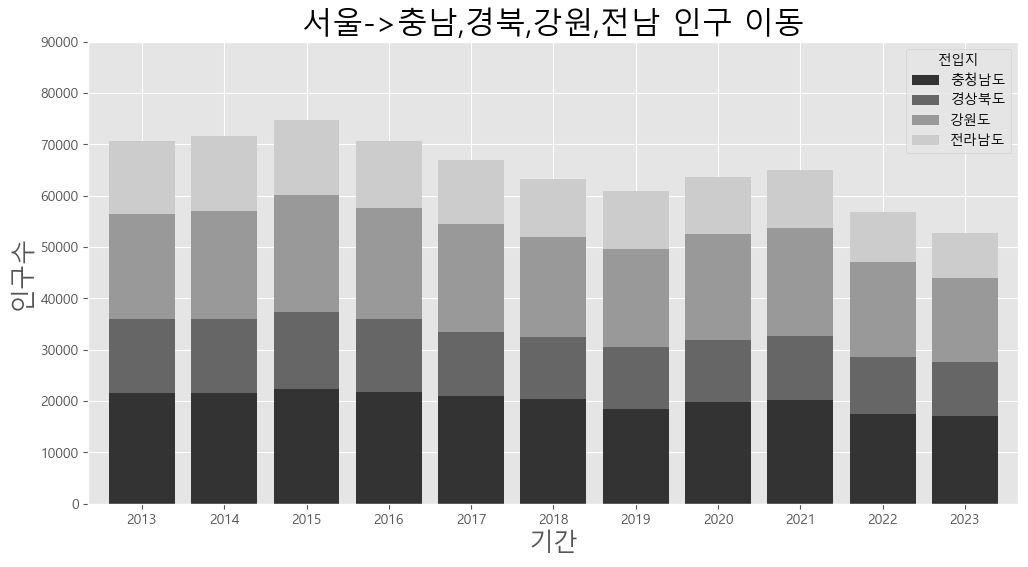

In [115]:
ax = df6.T.plot(kind = 'bar',figsize=(12,6), width = 0.8, stacked = True,color = ['0.2','0.4','0.6','0.8']) 
ax.set_title('서울->충남,경북,강원,전남 인구 이동',size = 22)  # 객체를 직접 만든 다음에 이에 대해서 작업
ax.set_ylim(0,90000)
ax.set_xlabel('기간',size=18)
ax.set_ylabel('인구수',size=18)
ax.set_xticklabels(df6.columns, rotation = 0)
plt.show()

In [120]:
year_list1 = [str(year) for year in range(2013,2024)]
year_list2 = list(map(str, range(2013,2024)))
year_list2

['2013',
 '2014',
 '2015',
 '2016',
 '2017',
 '2018',
 '2019',
 '2020',
 '2021',
 '2022',
 '2023']

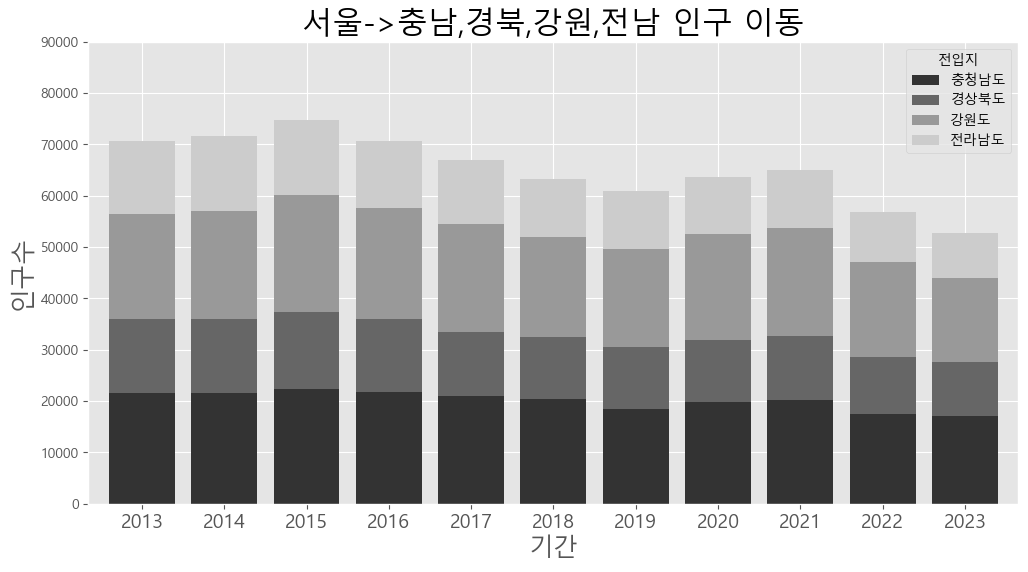

In [122]:
year_list = map(str, range(2013,2024))

ax = df6.T.plot(kind = 'bar',figsize=(12,6), width = 0.8, stacked = True,color = ['0.2','0.4','0.6','0.8']) 
ax.set_title('서울->충남,경북,강원,전남 인구 이동',size = 22)  # 객체를 직접 만든 다음에 이에 대해서 작업
ax.set_ylim(0,90000)
ax.set_xlabel('기간',size=18)
ax.set_ylabel('인구수',size=18)
ax.set_xticklabels(year_list, rotation = 0, size = 14)

plt.show()